# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [67]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
import requests
import time

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [68]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

In [87]:
city

'japura'

In [88]:
temperature = []
humidity = []
cloudiness = []
wind_speed = []
latitude = []
city_list = []

In [89]:
for city in cities:
    base_url = "https://api.openweathermap.org/data/2.5/weather?"
    url = base_url + "&q=" + city + "&units=Imperial"+ "&appid=" + api_key
    weather_response = requests.get(url)
    try:
        weather_json = weather_response.json()
        temperature.append(weather_json['main']['temp'])
        humidity.append(weather_json['main']['humidity'])
        cloudiness.append(weather_json['clouds']['all'])
        wind_speed.append(weather_json['wind']['speed'])
        latitude.append(weather_json['coord']['lat'])
        city_list.append(city)
    except: 
        weather_json = "City not found"
        print(weather_json)
return weather_json

City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not f

SyntaxError: 'return' outside function (<ipython-input-89-ec908a5e2165>, line 16)

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [90]:
temperature

[78.24,
 48.99,
 53.67,
 72.64,
 67.13,
 28.49,
 47.41,
 43,
 62.38,
 86,
 80.6,
 20.54,
 83.18,
 48.52,
 51.01,
 58.54,
 75.2,
 64.46,
 66.29,
 72.48,
 29.78,
 56.66,
 61,
 73.4,
 38.35,
 55,
 58.87,
 82.48,
 81.8,
 54.88,
 68.67,
 46.27,
 38.01,
 70.7,
 76.51,
 48.52,
 16.13,
 23,
 59.45,
 55.89,
 33.8,
 68.89,
 74.89,
 43.75,
 77,
 83.5,
 20.25,
 32.76,
 85.4,
 37.4,
 59,
 59.32,
 59.76,
 57.2,
 66.71,
 39.42,
 32.61,
 63.19,
 75.2,
 42.8,
 32,
 78.71,
 71.6,
 52.02,
 3.94,
 51.8,
 59.36,
 70.11,
 83.93,
 84.8,
 66.58,
 88.78,
 86,
 64.62,
 39.42,
 51.8,
 68.65,
 72.54,
 73.62,
 52,
 81,
 51.22,
 65.75,
 83.19,
 76.05,
 57.2,
 58.93,
 68.68,
 51.01,
 31.49,
 52,
 42.8,
 51.92,
 39.57,
 17.03,
 53.46,
 61.53,
 63.82,
 19.88,
 71.6,
 73.46,
 60.5,
 89.6,
 66.92,
 65.43,
 16.6,
 62.6,
 78.8,
 53.6,
 26.87,
 61.26,
 41,
 80.28,
 63.66,
 74.5,
 62.15,
 65.32,
 81.33,
 57.46,
 56.13,
 8.72,
 84.27,
 82.01,
 60.8,
 35.6,
 63.5,
 71.6,
 87.86,
 37.4,
 33.8,
 77.47,
 64.51,
 73.1,
 51.8,
 68

In [92]:
weather_dict = {
    "City": city_list,
    "Temperature": temperature,
    "Humidity": humidity, 
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed, 
    "Latitude": latitude,
}
final_df = pd.DataFrame(weather_dict)
final_df.head()

,City,Temperature,Humidity,Cloudiness,Wind Speed,Latitude
0,hilo,78.24,62,20,10.29,19.71
1,burnie,48.99,70,38,11.99,-41.05
2,busselton,53.67,59,100,12.42,-33.64
3,platanos,72.64,88,75,10.29,35.47
4,rikitea,67.13,83,100,10.45,-23.12


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [93]:
final_df.count()

City           553
Temperature    553
Humidity       553
Cloudiness     553
Wind Speed     553
Latitude       553
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [94]:
lat_values = final_df["Latitude"]
temp_values = final_df["Temperature"]
humid_values = final_df["Humidity"] 
cloud_values = final_df["Cloudiness"]
wind_values = final_df["Wind Speed"]

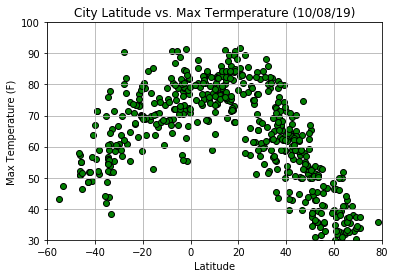

In [98]:
plt.scatter(lat_values, temp_values, c='green', edgecolors='black')
plt.title("City Latitude vs. Max Termperature (10/08/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.ylim(30, 100)
plt.xlim(-60, 80)
plt.grid()

#### Latitude vs. Humidity Plot

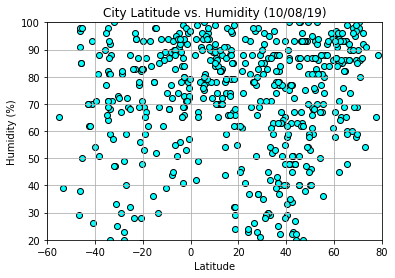

In [102]:
plt.scatter(lat_values, humid_values, c='cyan', edgecolors='black')
plt.title("City Latitude vs. Humidity (10/08/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(20, 100)
plt.xlim(-60, 80)
plt.grid()

#### Latitude vs. Cloudiness Plot

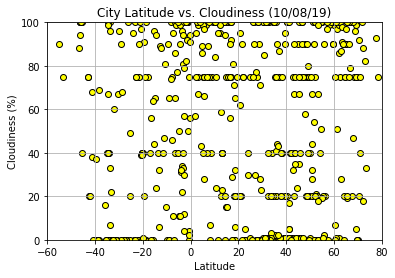

In [104]:
plt.scatter(lat_values, cloud_values, c='yellow', edgecolors='black')
plt.title("City Latitude vs. Cloudiness (10/08/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.ylim(0, 100)
plt.xlim(-60, 80)
plt.grid()

#### Latitude vs. Wind Speed Plot

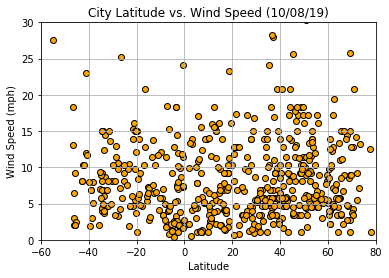

In [105]:
plt.scatter(lat_values, wind_values, c='orange', edgecolors='black')
plt.title("City Latitude vs. Wind Speed (10/08/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(0, 30)
plt.xlim(-60, 80)
plt.grid()